In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Path file CSV
file_path = '/content/extended_fmcg_demand_forecasting.csv'

# Membaca dataset
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
print(data.head())


         Date Product_Category  Sales_Volume      Price  Promotion  \
0  2022-01-01        Household          1583   5.190661          0   
1  2022-01-02    Personal Care          1103   8.949596          0   
2  2022-01-03            Dairy           455   4.867987          0   
3  2022-01-04    Personal Care          1107  16.968596          1   
4  2022-01-05    Personal Care          1447   4.309673          1   

  Store_Location  Weekday  Supplier_Cost  Replenishment_Lead_Time  Stock_Level  
0          Urban        5       9.299281                        9          207  
1          Urban        6      13.274109                        5          253  
2          Rural        0      13.302265                        9          245  
3          Urban        1      10.056158                        5          265  
4          Rural        2       3.562862                        8          334  


In [ ]:
# Dimensi dataset
print(f"Jumlah baris: {data.shape[0]}, Jumlah kolom: {data.shape[1]}")

# Informasi tipe data dan jumlah data kosong
print(data.info())

# Statistik deskriptif
print(data.describe())


Jumlah baris: 1000, Jumlah kolom: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1000 non-null   object 
 1   Product_Category         1000 non-null   object 
 2   Sales_Volume             1000 non-null   int64  
 3   Price                    1000 non-null   float64
 4   Promotion                1000 non-null   int64  
 5   Store_Location           1000 non-null   object 
 6   Weekday                  1000 non-null   int64  
 7   Supplier_Cost            1000 non-null   float64
 8   Replenishment_Lead_Time  1000 non-null   int64  
 9   Stock_Level              1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.2+ KB
None
       Sales_Volume        Price    Promotion      Weekday  Supplier_Cost  \
count   1000.000000  1000.000000  1000.000000  1000.000000    10

In [ ]:
# Nilai unik dari kolom tertentu
print("Kategori Produk:", data['Product_Category'].unique())
print("Lokasi Toko:", data['Store_Location'].unique())

Kategori Produk: ['Household' 'Personal Care' 'Dairy' 'Snacks' 'Beverages']
Lokasi Toko: ['Urban' 'Rural' 'Suburban']


In [ ]:
# Mengecek jumlah nilai kosong di setiap kolom
print(data.isnull().sum())

Date                       0
Product_Category           0
Sales_Volume               0
Price                      0
Promotion                  0
Store_Location             0
Weekday                    0
Supplier_Cost              0
Replenishment_Lead_Time    0
Stock_Level                0
dtype: int64


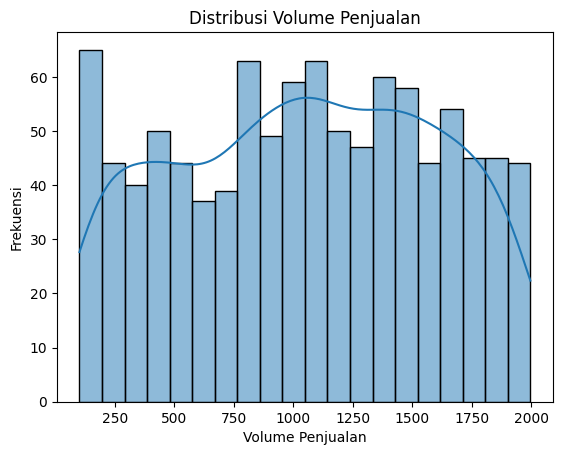

In [ ]:
sns.histplot(data['Sales_Volume'], kde=True, bins=20)
plt.title("Distribusi Volume Penjualan")
plt.xlabel("Volume Penjualan")
plt.ylabel("Frekuensi")
plt.show()

<ipython-input-7-fb423d30bf96>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.set_index('Date').resample('M')['Sales_Volume'].sum()


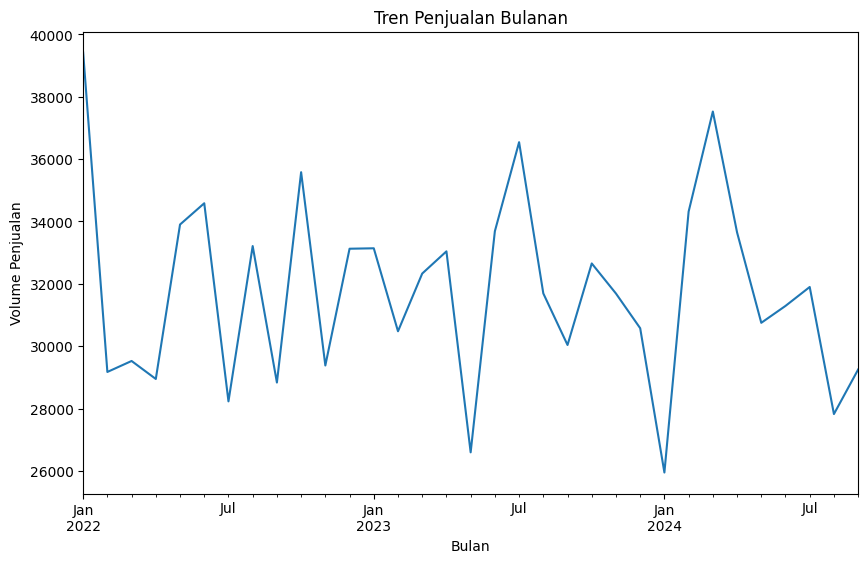

In [ ]:
# Konversi kolom 'Date' ke tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# Melihat tren penjualan bulanan
monthly_sales = data.set_index('Date').resample('M')['Sales_Volume'].sum()
monthly_sales.plot(title="Tren Penjualan Bulanan", figsize=(10, 6))
plt.xlabel("Bulan")
plt.ylabel("Volume Penjualan")
plt.show()

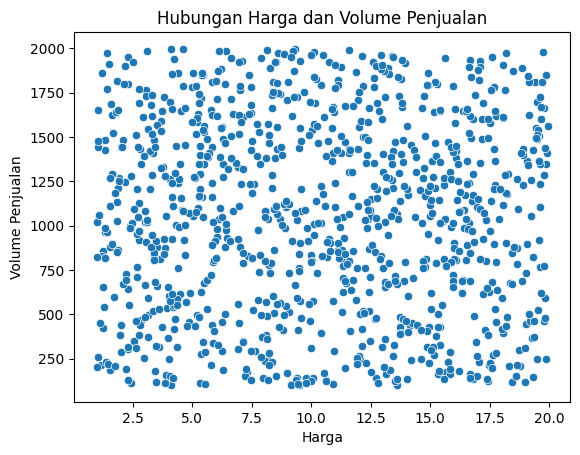

In [ ]:
sns.scatterplot(x='Price', y='Sales_Volume', data=data)
plt.title("Hubungan Harga dan Volume Penjualan")
plt.xlabel("Harga")
plt.ylabel("Volume Penjualan")
plt.show()

In [ ]:
# Mengecek jumlah baris duplikat
duplicates = data.duplicated()
print(f"Jumlah baris duplikat: {duplicates.sum()}")

Jumlah baris duplikat: 0


In [ ]:
# Simpan dataset bersih
data.to_csv('cleaned_fmcg_data.csv', index=False)